In [1]:
#necessary installation
!pip install numpy pandas matplotlib seaborn


In [66]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [67]:
df = pd.read_csv("D:\DATA\House_Price_Prediction_Dataset.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [68]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [69]:
df.shape

(2000, 10)

In [70]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [72]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [73]:
#check for null values
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [74]:
df["Condition"].unique()


array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [75]:
df["Condition"] = df["Condition"].str.strip().str.title()
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [76]:
mapping = {
    "Excellent": 1,
    "Good": 2,
    "Fair": 3,
    "Poor": 4
}

df["Condition"] = df["Condition"].replace(mapping)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13700\680670169.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Condition"] = df["Condition"].replace(mapping)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,1,No,149919
1,2,4272,5,4,3,1958,Downtown,1,No,424998
2,3,3592,2,2,3,1938,Downtown,2,No,266746
3,4,966,4,2,2,1902,Suburban,3,Yes,244020
4,5,4926,1,4,2,1975,Downtown,3,Yes,636056


In [77]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,4,No,295620
1996,1997,3046,5,2,1,2019,Suburban,4,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,4,No,476925
1998,1999,4062,3,1,2,1936,Urban,1,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,3,No,482525


In [78]:
garage_map = {
    'Yes': 1,
    'No': 0
}
df["Garage"] = df["Garage"].replace(garage_map)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13700\3799620908.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Garage"] = df["Garage"].replace(garage_map)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,1,0,149919
1,2,4272,5,4,3,1958,Downtown,1,0,424998
2,3,3592,2,2,3,1938,Downtown,2,0,266746
3,4,966,4,2,2,1902,Suburban,3,1,244020
4,5,4926,1,4,2,1975,Downtown,3,1,636056


In [79]:
df["Location"].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

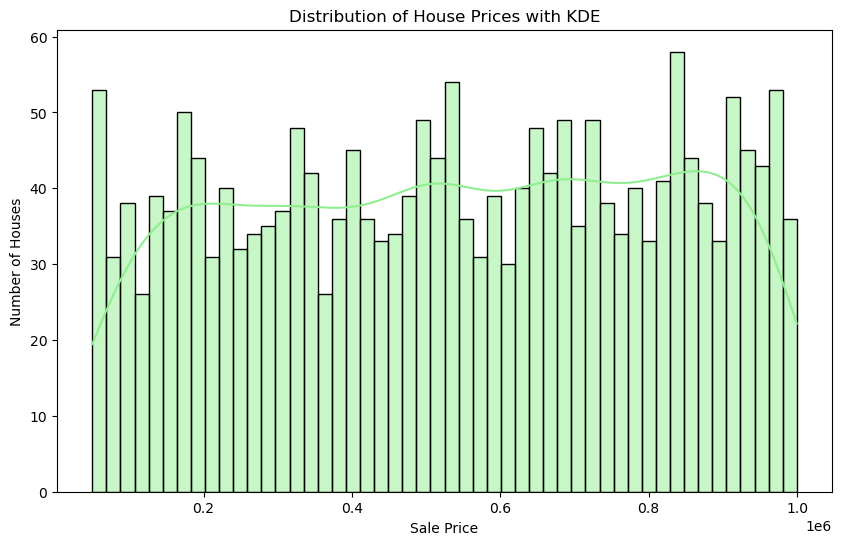

In [87]:
#Histogram
target_column ="Price"
plt.figure(figsize=(10,6))
sb.histplot(df[target_column], bins=50, kde=True, color='lightgreen')
plt.title("Distribution of House Prices with KDE")
plt.xlabel("Sale Price")
plt.ylabel("Number of Houses")
plt.show()

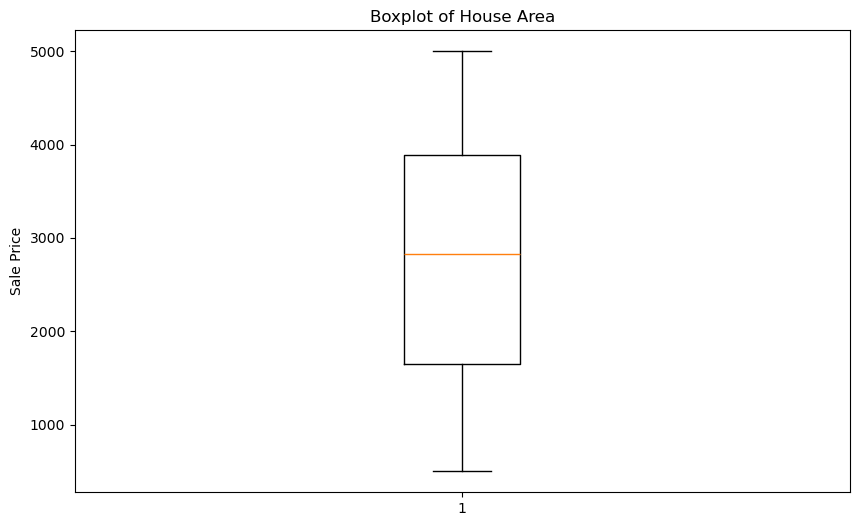

In [85]:
#Boxplot
plt.figure(figsize=(10,6))
plt.boxplot(df["Area"])
plt.title("Boxplot of House Area")
plt.ylabel("Sale Price")
plt.show()

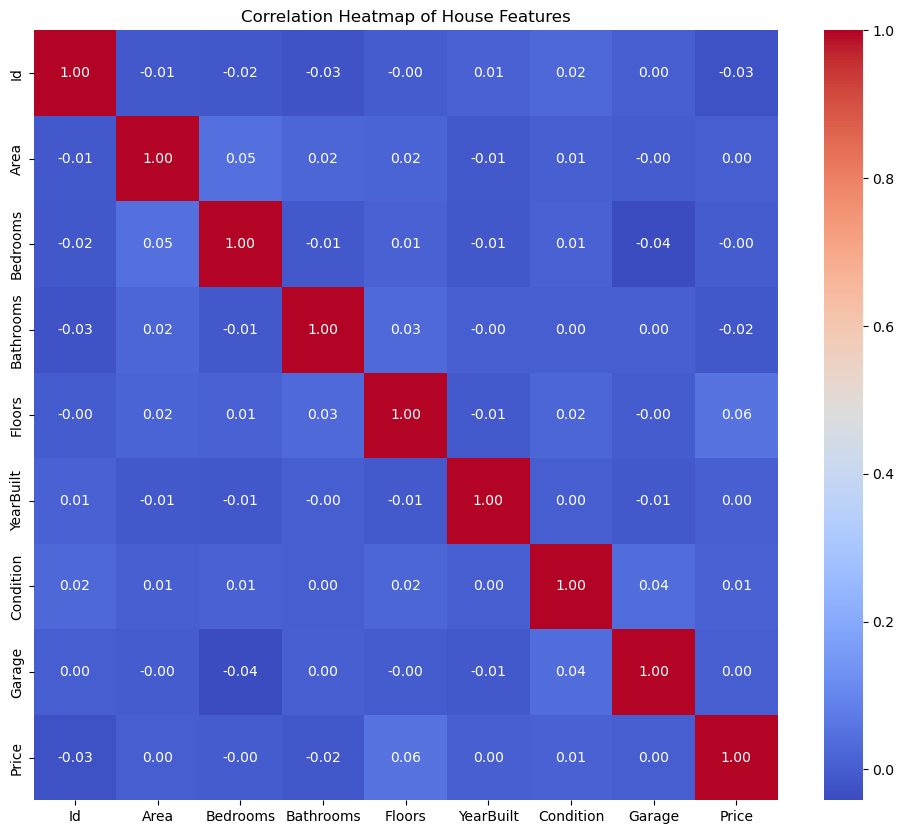

In [89]:
# Correlation Heatmap
df = df.drop('Location', axis = 1)
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sb.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of House Features")
plt.show()